In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from ipywidgets import interact_manual

In [2]:
x_data = pd.read_excel('taipei_running_data_x.xlsx')

In [3]:
y_data = pd.read_excel('taipei_running_data_y.xlsx')

In [4]:
print("x_data",x_data)
print("y_data",y_data)

x_data       土地移轉總面積(平方公尺)  工  住  商  其他  交易筆棟數_土地  交易筆棟數_建物  交易筆棟數_車位      移轉層次  \
0          0.039182  0  1  0   0  0.035714       0.1  0.166667  0.222222   
1          0.031495  0  1  0   0  0.071429       0.1  0.083333  0.305556   
2          0.027822  0  1  0   0  0.035714       0.1  0.083333  0.194444   
3          0.038581  0  0  1   0  0.035714       0.1  0.000000  0.333333   
4          0.019160  0  0  1   0  0.035714       0.1  0.000000  0.194444   
...             ... .. .. ..  ..       ...       ...       ...       ...   
8675       0.123999  0  1  0   0  0.035714       0.1  0.083333  0.138889   
8676       0.035054  0  0  1   0  0.071429       0.1  0.083333  0.527778   
8677       0.003803  0  0  1   0  0.035714       0.1  0.000000  0.416667   
8678       0.105976  0  1  0   0  0.071429       0.1  0.083333  0.444444   
8679       0.022752  0  0  1   0  0.071429       0.1  0.083333  0.416667   

          總樓層數  ...  其他.1  坡道平面  坡道機械  塔式車位  空格   交易標的橫坐標   交易標的縱坐標        屋齡  \

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=0)

In [6]:
print("X_train",X_train)
print("y_train",y_train)
print("X_test",X_test)
print("y_test",y_test)

X_train       土地移轉總面積(平方公尺)  工  住  商  其他  交易筆棟數_土地  交易筆棟數_建物  交易筆棟數_車位      移轉層次  \
252        0.037590  0  1  0   0  0.071429       0.1  0.000000  0.250000   
1839       0.017292  0  0  1   0  0.035714       0.1  0.083333  0.555556   
718        0.028911  0  0  1   0  0.071429       0.1  0.083333  0.222222   
3667       0.039654  0  1  0   0  0.035714       0.1  0.166667  0.361111   
2883       0.007167  0  0  0   1  0.035714       0.1  0.000000  0.555556   
...             ... .. .. ..  ..       ...       ...       ...       ...   
4373       0.024572  0  1  0   0  0.035714       0.1  0.083333  0.472222   
7891       0.014171  0  1  0   0  0.107143       0.1  0.000000  0.305556   
4859       0.018657  0  0  1   0  0.035714       0.1  0.000000  0.277778   
3264       0.027319  0  1  0   0  0.035714       0.1  0.000000  0.277778   
2732       0.017357  0  0  1   0  0.035714       0.1  0.000000  0.194444   

          總樓層數  ...  其他.1  坡道平面  坡道機械  塔式車位  空格   交易標的橫坐標   交易標的縱坐標        屋齡  

In [7]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


# For functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [16]:
model = Sequential()
# model.add(LSTM(50,dropout=0.2, input_shape(), return_sequence = True))
# model.add(LSTM(50,dropout=0.2, return_sequence = True))

# model.add(Flatten())

# model.add(Dense(256,input_dim=46,activation='relu'))
model.add(Dense(256,input_dim=46,activation=tf.keras.layers.LeakyReLU(alpha=0.2)))
model.add(BatchNormalization())

# model.add(Dense(128,activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.2)))
model.add(Dropout(0.2))
# model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation=tf.keras.layers.LeakyReLU(alpha=0.2)))
model.add(Dense(1,activation=tf.keras.layers.LeakyReLU(alpha=0.2)))
model.compile(loss='mean_absolute_percentage_error',optimizer='Adam')

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               12032     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 54,273
Trainable params: 53,761
Non-trainable params: 512
________________________________________________

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'loss', patience = 30, verbose = 0, mode = 'auto') 

In [19]:
history = model.fit(X_train,y_train,batch_size=128,epochs=500,validation_split = 0.3,callbacks = [early_stopping])

Epoch 1/500
36/36 [==============================] - 0s 6ms/step - loss: 99.9898 - val_loss: 99.9930
Epoch 2/500
36/36 [==============================] - 0s 5ms/step - loss: 99.8355 - val_loss: 99.8876
Epoch 3/500
36/36 [==============================] - 0s 4ms/step - loss: 98.8923 - val_loss: 99.2299
Epoch 4/500
36/36 [==============================] - 0s 4ms/step - loss: 95.9232 - val_loss: 96.7020
Epoch 5/500
36/36 [==============================] - 0s 4ms/step - loss: 88.9386 - val_loss: 90.6496
Epoch 6/500
36/36 [==============================] - 0s 5ms/step - loss: 75.8923 - val_loss: 77.2829
Epoch 7/500
36/36 [==============================] - 0s 6ms/step - loss: 58.7956 - val_loss: 60.8241
Epoch 8/500
36/36 [==============================] - 0s 6ms/step - loss: 43.5117 - val_loss: 45.9354
Epoch 9/500
36/36 [==============================] - 0s 5ms/step - loss: 29.6863 - val_loss: 30.8302
Epoch 10/500
36/36 [==============================] - 0s 7ms/step - loss: 24.7533 - val_los

36/36 [==============================] - 0s 4ms/step - loss: 20.0127 - val_loss: 20.2634
Epoch 82/500
36/36 [==============================] - 0s 4ms/step - loss: 19.7934 - val_loss: 20.0509
Epoch 83/500
36/36 [==============================] - 0s 4ms/step - loss: 19.9250 - val_loss: 20.8291
Epoch 84/500
36/36 [==============================] - 0s 5ms/step - loss: 20.0680 - val_loss: 19.9763
Epoch 85/500
36/36 [==============================] - 0s 5ms/step - loss: 20.1525 - val_loss: 20.1225
Epoch 86/500
36/36 [==============================] - 0s 4ms/step - loss: 20.0416 - val_loss: 20.0403
Epoch 87/500
36/36 [==============================] - 0s 4ms/step - loss: 20.0735 - val_loss: 20.5883
Epoch 88/500
36/36 [==============================] - 0s 4ms/step - loss: 20.3070 - val_loss: 19.7812
Epoch 89/500
36/36 [==============================] - 0s 5ms/step - loss: 19.8485 - val_loss: 19.8291
Epoch 90/500
36/36 [==============================] - 0s 4ms/step - loss: 19.9523 - val_loss: 1

36/36 [==============================] - 0s 4ms/step - loss: 18.3435 - val_loss: 19.5564
Epoch 161/500
36/36 [==============================] - 0s 4ms/step - loss: 18.7900 - val_loss: 18.2718
Epoch 162/500
36/36 [==============================] - 0s 4ms/step - loss: 18.4531 - val_loss: 18.7891
Epoch 163/500
36/36 [==============================] - 0s 4ms/step - loss: 18.2702 - val_loss: 18.6409
Epoch 164/500
36/36 [==============================] - 0s 4ms/step - loss: 18.3844 - val_loss: 18.3112
Epoch 165/500
36/36 [==============================] - 0s 4ms/step - loss: 18.2675 - val_loss: 18.3500
Epoch 166/500
36/36 [==============================] - 0s 4ms/step - loss: 18.4278 - val_loss: 18.1470
Epoch 167/500
36/36 [==============================] - 0s 4ms/step - loss: 18.6251 - val_loss: 18.4306
Epoch 168/500
36/36 [==============================] - 0s 4ms/step - loss: 17.7307 - val_loss: 18.3639
Epoch 169/500
36/36 [==============================] - 0s 4ms/step - loss: 18.3478 - va

36/36 [==============================] - 0s 4ms/step - loss: 17.0360 - val_loss: 18.1037
Epoch 240/500
36/36 [==============================] - 0s 4ms/step - loss: 17.0403 - val_loss: 18.0278
Epoch 241/500
36/36 [==============================] - 0s 4ms/step - loss: 16.8470 - val_loss: 17.7940
Epoch 242/500
36/36 [==============================] - 0s 4ms/step - loss: 16.6745 - val_loss: 18.3387
Epoch 243/500
36/36 [==============================] - 0s 4ms/step - loss: 16.8578 - val_loss: 18.1479
Epoch 244/500
36/36 [==============================] - 0s 4ms/step - loss: 17.2617 - val_loss: 17.9962
Epoch 245/500
36/36 [==============================] - 0s 4ms/step - loss: 16.9068 - val_loss: 18.0198
Epoch 246/500
36/36 [==============================] - 0s 4ms/step - loss: 16.7721 - val_loss: 18.3877
Epoch 247/500
36/36 [==============================] - 0s 4ms/step - loss: 16.8858 - val_loss: 18.0984
Epoch 248/500
36/36 [==============================] - 0s 4ms/step - loss: 17.0900 - va

36/36 [==============================] - 0s 4ms/step - loss: 15.5936 - val_loss: 17.8870
Epoch 319/500
36/36 [==============================] - 0s 4ms/step - loss: 15.5935 - val_loss: 17.7812
Epoch 320/500
36/36 [==============================] - 0s 4ms/step - loss: 15.4019 - val_loss: 17.5453
Epoch 321/500
36/36 [==============================] - 0s 4ms/step - loss: 15.5340 - val_loss: 17.3697
Epoch 322/500
36/36 [==============================] - 0s 4ms/step - loss: 15.5570 - val_loss: 17.5699
Epoch 323/500
36/36 [==============================] - 0s 4ms/step - loss: 15.5478 - val_loss: 17.6842
Epoch 324/500
36/36 [==============================] - 0s 4ms/step - loss: 15.4666 - val_loss: 17.7056
Epoch 325/500
36/36 [==============================] - 0s 4ms/step - loss: 15.4205 - val_loss: 17.6375
Epoch 326/500
36/36 [==============================] - 0s 4ms/step - loss: 15.4880 - val_loss: 17.4160
Epoch 327/500
36/36 [==============================] - 0s 5ms/step - loss: 15.4478 - va

36/36 [==============================] - 0s 5ms/step - loss: 14.7378 - val_loss: 17.4211
Epoch 398/500
36/36 [==============================] - 0s 5ms/step - loss: 14.7427 - val_loss: 17.5240
Epoch 399/500
36/36 [==============================] - 0s 6ms/step - loss: 14.7773 - val_loss: 17.5153
Epoch 400/500
36/36 [==============================] - 0s 6ms/step - loss: 14.5726 - val_loss: 17.2292
Epoch 401/500
36/36 [==============================] - 0s 6ms/step - loss: 14.8767 - val_loss: 17.7405
Epoch 402/500
36/36 [==============================] - 0s 6ms/step - loss: 14.8248 - val_loss: 16.9871
Epoch 403/500
36/36 [==============================] - 0s 6ms/step - loss: 14.6082 - val_loss: 17.2047
Epoch 404/500
36/36 [==============================] - 0s 6ms/step - loss: 14.8781 - val_loss: 17.5391
Epoch 405/500
36/36 [==============================] - 0s 5ms/step - loss: 14.6174 - val_loss: 17.0554
Epoch 406/500
36/36 [==============================] - 0s 6ms/step - loss: 14.8725 - va

36/36 [==============================] - 0s 4ms/step - loss: 14.1687 - val_loss: 17.4329
Epoch 477/500
36/36 [==============================] - 0s 5ms/step - loss: 14.2869 - val_loss: 17.1547
Epoch 478/500
36/36 [==============================] - 0s 5ms/step - loss: 14.2369 - val_loss: 16.8088
Epoch 479/500
36/36 [==============================] - 0s 5ms/step - loss: 14.1144 - val_loss: 17.2957
Epoch 480/500
36/36 [==============================] - 0s 4ms/step - loss: 14.1874 - val_loss: 16.6924
Epoch 481/500
36/36 [==============================] - 0s 4ms/step - loss: 14.1501 - val_loss: 17.2429
Epoch 482/500
36/36 [==============================] - 0s 4ms/step - loss: 14.3445 - val_loss: 16.9422
Epoch 483/500
36/36 [==============================] - 0s 4ms/step - loss: 14.2134 - val_loss: 17.1335
Epoch 484/500
36/36 [==============================] - 0s 5ms/step - loss: 14.2163 - val_loss: 16.9398
Epoch 485/500
36/36 [==============================] - 0s 5ms/step - loss: 14.1659 - va

In [20]:
result = model.predict(X_test)
len(result)

2170

In [21]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [22]:
MAPE(y_test,result)

16.329422900413253

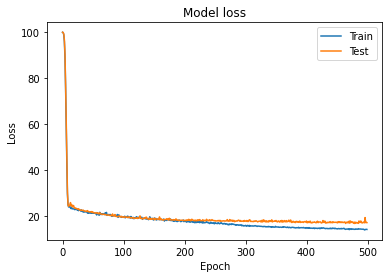

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()